In [49]:
import pandas as pd
arquivo = pd.read_csv('wine_dataset.csv')


In [50]:
arquivo.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [51]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [52]:
# para o modelo funcionar a coluna style tem que ser numérico
arquivo['style'] = arquivo['style'].replace('red',0)
arquivo['style'] = arquivo['style'].replace('white',1)

In [53]:
arquivo

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [54]:
arquivo.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [55]:
# separando a variável style que é o alvo, y é a preditora
x = arquivo.drop('style', axis=1).values
y = arquivo['style'].values


In [56]:
x[:,0].max(), x[:,1].max(), x[:,2].max()

(15.9, 1.58, 1.66)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler_vinho = StandardScaler()
x = scaler_vinho.fit_transform(x)

In [58]:
x[:,0].max(), x[:,1].max(), x[:,2].max()

(6.699425498517088, 7.534353930914938, 9.23128086996183)

In [59]:
x

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [60]:
# criando o conjunto de treino e teste 

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [61]:
x_treino.shape


(4547, 12)

In [62]:
y_treino.shape

(4547,)

In [63]:
x_teste.shape, y_teste.shape

((1950, 12), (1950,))

In [64]:
from sklearn.naive_bayes import GaussianNB
naive_vinho_data = GaussianNB()
naive_vinho_data.fit(x_treino, y_treino)

GaussianNB()

In [65]:
previsoes = naive_vinho_data.predict(x_teste)
previsoes

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [66]:
y_teste

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste, previsoes)

0.9743589743589743

In [68]:
from yellowbrick.classifier import ConfusionMatrix

0.9743589743589743

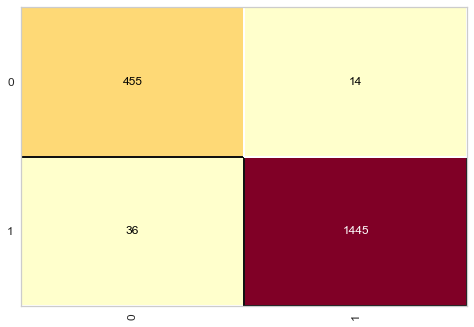

In [70]:
cm = ConfusionMatrix(naive_vinho_data)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [71]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       469
           1       0.99      0.98      0.98      1481

    accuracy                           0.97      1950
   macro avg       0.96      0.97      0.97      1950
weighted avg       0.98      0.97      0.97      1950

